In [4]:
import pandas as pd
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
#converting into date-time format
df['date_added']=pd.to_datetime(df['date_added'], dayfirst= True,errors='coerce')

In [10]:
# Create new columns
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['content_age'] = 2025 - df['release_year'] #how old is the content currently 
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,content_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,5
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,4
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,4
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,4
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,4


In [11]:
# Fill NA values 
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['listed_in'] = df['listed_in'].fillna('Unknown')


In [12]:
df.groupby(['year_added', 'type']).size().unstack()

type,Movie,TV Show
year_added,,
2008.0,1.0,1.0
2009.0,2.0,NaN
2010.0,1.0,NaN
2011.0,13.0,NaN
2012.0,3.0,NaN
2013.0,6.0,4.0
2014.0,19.0,4.0
2015.0,56.0,17.0
2016.0,253.0,165.0


<Axes: xlabel='year_added'>

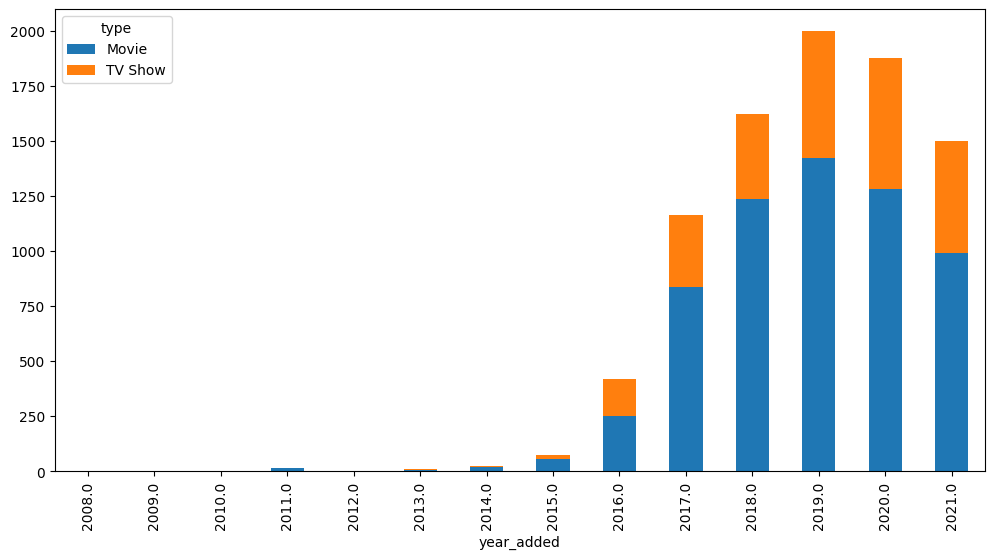

In [16]:
df.groupby(['year_added', 'type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))


<Axes: ylabel='main_country'>

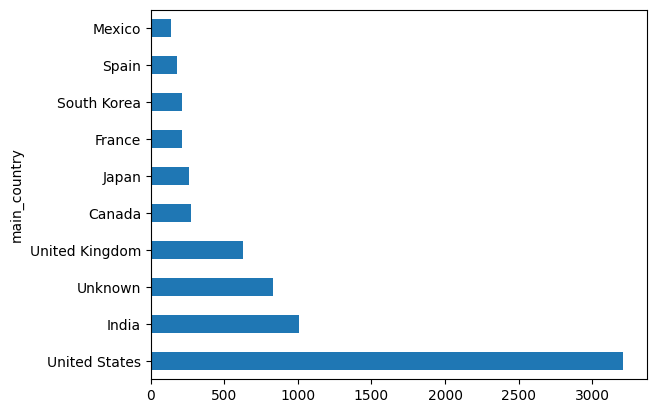

In [17]:
#Country Analysis :Top producing countries
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])
df['main_country'].value_counts().head(10).plot(kind='barh')


<Axes: xlabel='main_genre'>

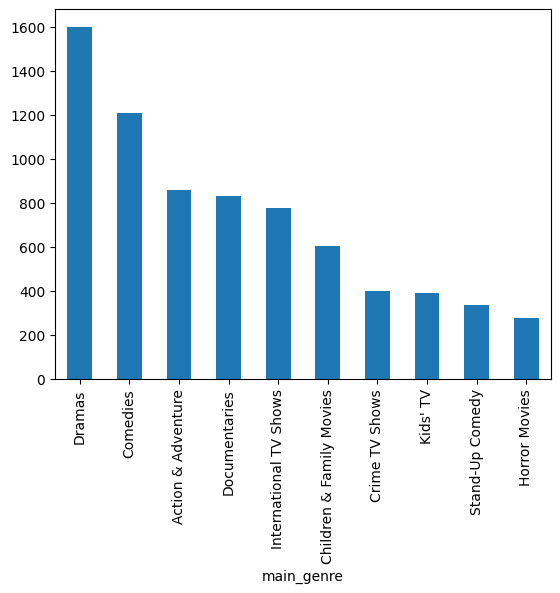

In [18]:
# Genre & Rating Analysis
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['main_genre'].value_counts().head(10).plot(kind='bar')


In [19]:
#preparing time series data
ts = df.groupby('date_added').size().resample('M').sum()
ts = ts.reset_index()
ts.columns = ['ds', 'y']


C:\Users\hp\AppData\Local\Temp\ipykernel_10936\3592643401.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df.groupby('date_added').size().resample('M').sum()


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 4.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.3 MB 3.5 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/13.3 MB 3.4 MB/s eta 0:00:04
   -------- ------------------------------- 2.9/13.3 MB 3.5 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/13.3 MB 3.8 MB/s eta 0:00:03
   ------------- -------------------------- 4.5/13.3 MB 3.8 MB/s eta 0:00:03
   ---------------- ----------------------- 5.5/13.3 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 6.3/13.3 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.3 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 8.4/13.3 MB 4.1 MB/s eta 0:00:02
   --------------------------- ------------ 9.2/13.3 MB 4.1 MB/s eta 0:00:02
   ----------------------------- ---------- 10.0/13.3 MB 4.1 MB/s eta 0:00:01
   --

21:03:09 - cmdstanpy - INFO - Chain [1] start processing
21:03:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


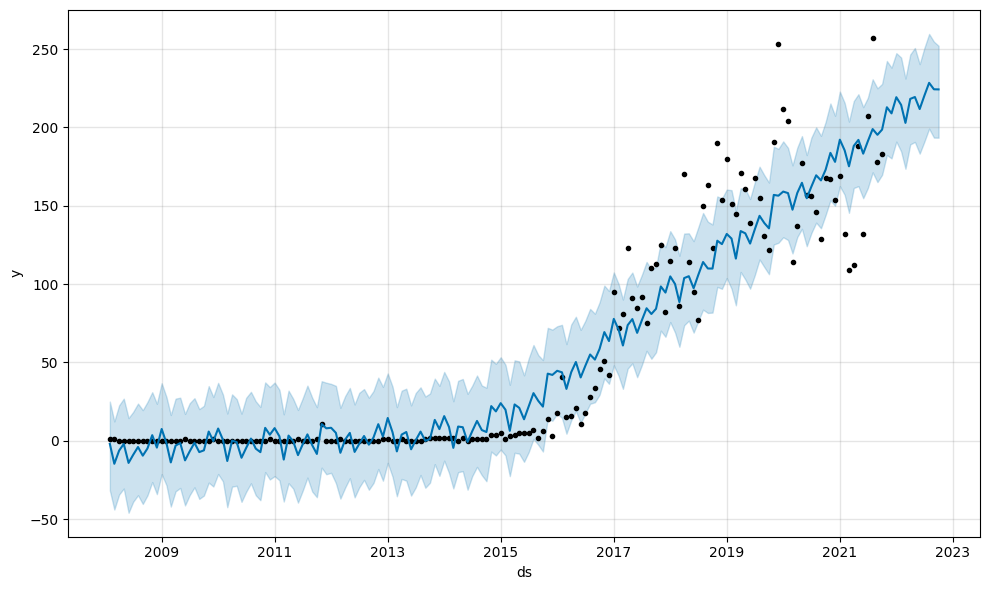

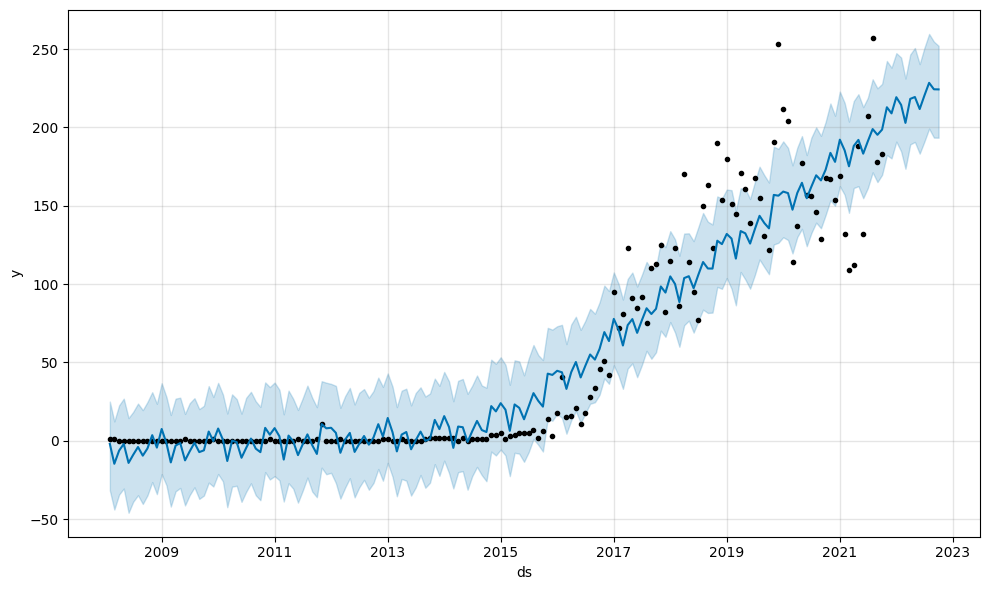

In [21]:
!pip install prophet

from prophet import Prophet

model = Prophet()
model.fit(ts)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

model.plot(forecast)


In [22]:
df.to_csv('netflix_cleaned.csv', index=False)


In [24]:
basics = pd.read_csv('title.basics.tsv', sep='\t', na_values='\\N')
ratings = pd.read_csv('title.ratings.tsv', sep='\t')


C:\Users\hp\AppData\Local\Temp\ipykernel_10936\2354479939.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  basics = pd.read_csv('title.basics.tsv', sep='\t', na_values='\\N')


In [26]:
import pandas as pd

netflix_df = pd.read_csv('netflix_titles.csv')  # Make sure the file path is correct

merged = netflix_df.merge(basics[['tconst', 'primaryTitle', 'startYear']],
                          left_on=['title','release_year'],
                          right_on=['primaryTitle','startYear'],
                          how='left')
merged = merged.merge(ratings[['tconst','averageRating','numVotes']], on='tconst', how='left')


In [27]:
merged.to_csv('netflix_with_imdb.csv', index=False)
